<a href="https://colab.research.google.com/github/dayeong089/web_scrapping/blob/main/Week6_Project_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Coaching for Python
# Week 6: Project Presentation

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/PythonCoaching"
my_folder = "dayoung21/project"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Executive Summary

### Name

박다영

### Target Web Site

GlobalNews.ca: https://globalnews.ca/


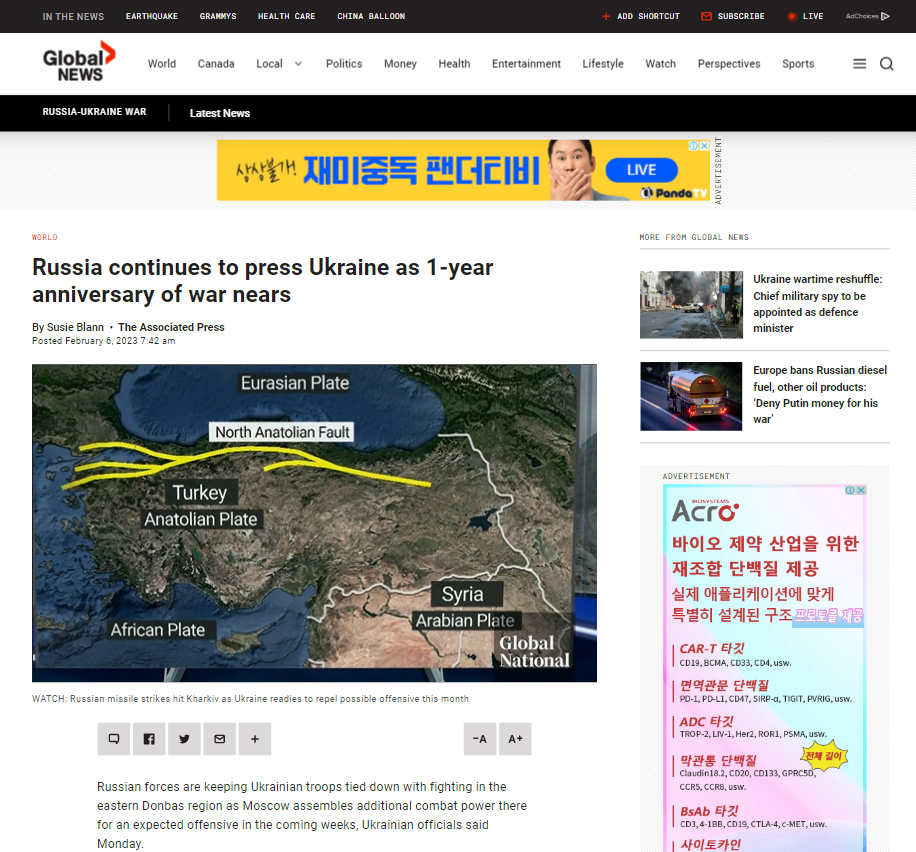

In [ ]:
from IPython.display import Image
Image(f"{path}/{my_folder}/article.png")

### Reasons Why I Chose the Web Site

<!-- FiveThirtyEight.com은 본인이 평소 즐겨찾는 사이트로서, 정치, 스포츠, 과학 등 다양한 분야의 주제들을 "데이터"와 "통계분석"을 통해 심도 있게 다루는 기사들이 많이 올라옴. 이에 최소 1년치에 해당하는 많은 기사들을 수집해 다양한 텍스트 분석을 해보고자 하였음.    -->

GlobalNews.ca는 2009년에 만들어진 캐나다 뉴스 사이트로, WORLD 카테고리에서 다양한 분야의 세계 각국의 주요 이슈들을 전달하고 있음. 따라서 이 사이트의 WORLD 카테고리의 많은 기사들을 수집하고 분석하여 최근 5년동안의 세계의 주요 사건을 파악하고자 하였음.



### Total Number of Web Articles Collected

22,698 건

### Data Time Range

2018-01-01 - 2023-02-02 (약 5년)

### Key Findings and Lessons


- 최근 5년간 세계에서 일어난 주요 사건들을 연도별 키워드 분석을 통해 살펴볼 수 있었음
- 2020년 세계적인 코로나 확산으로 인해 많은 글들이 게재되었음을 확인함

### Major Challenges

- 많은 양의 정보를 가져오고 분석하기 위해 시간이 오래 걸림
- kmeans clustering과 topic modeling이 distinctive하게 나눠지지 않음
- 세계 여러 이슈를 모두 알고있지는 못하므로 키워드 분석 이후 검색을 통해 정확한 이해가 가능했음

### Future Work

<!--

- 키워드 분석에서 어떤 단어의 단수 형태와 복수 형태가 서로 다른 단어로 구별되는 문제가 있었음. 수업 시간에 배운 word stemming 기술을 적용하여 동일한 단어로 취급해볼 여지가 있음.
- 하나의 단어가 여러 가지 의미를 가질 수 있기 때문에, 키워드 랭킹에서 등장한 의미가 불명확한 단어들의 정확한 의미를 밝혀내면 더 정확한 분석을 할 수 있으리라 생각됨. (가령 win이나 lose가 경기 결과와 관련된 표현인지 아니면 선거 결과와 관련된 표현인지)
- Time series 분석에서 peak week 분석 뿐만 아니라 시간에 따른 키워드 랭킹의 변화를 추적해봄으로써 관심사가 어떻게 변하는지를 살펴보는 것도 의미가 있으리라 생각됨.
- 데이터의 time range를 현재 16개월에서 수 년으로 확장해보는 것도 의미 있는 시도일 것임.
- 정치와 스포츠 분야 이외에도 데이터 및 통계 분석이 적극적으로 활용될 수 있는 영역이 무엇일지 고민.  -->

- 동사 분석에서 'killed'와 같은 키워드들이 어떤 사건과 관련있는지(코로나/전쟁/범죄 등) 분석
- 데이터의 time range를 5년보다 더 확장하여 분석
- 특정 사건에 대한 polarity를 적용해 그 사건에 대해 부정적인 기사인지 긍정적인 기사인지 분석
- say와 says와 같이 같은 의미의 단어가 구분되어 분석되었으므로 word stemming 기술을 적용해 더 정확한 분석
- 이 사이트뿐만 아니라 다른 자주 이용하는 사이트에 대해서도 분석

## Installing Necessary Packages

In [ ]:
! pip install --user nltk pyldavis scikit-learn==1.0.2 textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading Data

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{outcome_folder}/html_metadata.csv", sep="\t")
df = df.dropna(subset=["title", "author", "datetime", "body"], axis=0)
df.datetime = df.datetime.astype("datetime64")
df.sort_values(by='datetime', inplace = True)
df

,file_name,title,author,datetime,body
723,2270--2018-new-years-celebrations.html,2018 New Year’s celebrations around the world,Staff by The Associated Press,2018-01-01 00:20:00,"Spectacular fireworks have lit up the skies in Hong Kong, Australia and elsewhere in Asia as revelers ring in 2018. A look at how people around th..."
722,2270--iran-protesters-jobs.html,Iran protests fueled by young people more interested in jobs than Islamist idealism,Bozorgmehr Sharafedin,2018-01-01 10:24:00,"LONDON, Dec 31 (Reuters) – Iran warned of a tough crackdown on Sunday against demonstrators posing one of the boldest challenges to its clerical l..."
721,2270--kim-jong-un-nuclear-button.html,‘Nuclear button is always on my desk’: Kim Jong-Un warns U.S. in New Year’s address,Staff by Reuters,2018-01-01 11:00:00,"SEOUL, Jan 1 (Reuters) – North Korean leader Kim Jong Un said on Monday that the United States will never be able to start a war against North Kor..."
719,2269--polar-bear-dip-icy-swim-canada.html,Polar bear dips: Canada’s bravest ring in the new year with an icy swim,Jessica Vomiero,2018-01-01 14:41:00,"While two annual New Year’s Day polar bear swims were cancelled due to extreme cold, nothing could keep swimmers in Halifax out of the frigid Atla..."
718,2269--heres-what-the-worlds-largest-firework-looks-like.html,Here’s what the world’s largest firework looks like,Alexander Maveal,2018-01-01 14:49:00,"It should come as no surprise that the United Arab Emirates takes its New Year’s Eve celebrations seriously.Every year, the country welcomes milli..."
...,...,...,...,...,...
22728,1--iran-jails-couple-dance-viral-video.html,Young couple who danced in viral video handed lengthy jail sentence in Iran,Kathryn Mannie,2023-02-02 14:31:00,A young couple in Iran have been arrested and imprisoned after posting a video of themselves dancing together in front of Tehran’s Azadi (Freedom)...
22726,1--canada-covid-china-travel-april.html,Canada extends COVID-19 measures for travellers from China to early April,Sean Boynton,2023-02-02 16:48:00,"Canada is extending its COVID-19 testing requirements for travellers from China, Hong Kong and Macau for another two months, the federal governmen..."
22727,1--tiktok-risks-canada-iqra-khalid.html,Is TikTok a risk to Canadian privacy? A federal committee wants to find out,Rachel Gilmore,2023-02-02 18:20:00,"A House of Commons committee voted on Wednesday to launch a study into TikTok, a popular social media app that’s come under scrutiny over its ties..."
22724,1--pakistan-bus-crash.html,"At least 17 dead after bus-truck collision in Pakistan, official says",Staff by The Associated Press,2023-02-02 21:44:00,A head-on collision between a passenger bus and a speeding truck trailer near a tunnel in northwest Pakistan overnight killed at least 17 passenge...


https://globalnews.ca/news/9456283/china-us-surveillance-balloon-west/

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 723 to 22725
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   file_name  22698 non-null  object        
 1   title      22698 non-null  object        
 2   author     22698 non-null  object        
 3   datetime   22698 non-null  datetime64[ns]
 4   body       22698 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.0+ MB


## Popular Keywords Ranking

In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

%time df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
%time df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 3.33 s, sys: 21.8 ms, total: 3.35 s
Wall time: 3.51 s
CPU times: user 30 s, sys: 471 ms, total: 30.4 s
Wall time: 42 s


In [ ]:
df

,file_name,title,author,datetime,body,words,tagged_words
723,2270--2018-new-years-celebrations.html,2018 New Year’s celebrations around the world,Staff by The Associated Press,2018-01-01 00:20:00,"Spectacular fireworks have lit up the skies in Hong Kong, Australia and elsewhere in Asia as revelers ring in 2018. A look at how people around th...","[2018, New, Year, ’, s, celebrations, around, the, world]","[(2018, CD), (New, NNP), (Year, NNP), (’, NNP), (s, VBD), (celebrations, NNS), (around, IN), (the, DT), (world, NN)]"
722,2270--iran-protesters-jobs.html,Iran protests fueled by young people more interested in jobs than Islamist idealism,Bozorgmehr Sharafedin,2018-01-01 10:24:00,"LONDON, Dec 31 (Reuters) – Iran warned of a tough crackdown on Sunday against demonstrators posing one of the boldest challenges to its clerical l...","[Iran, protests, fueled, by, young, people, more, interested, in, jobs, than, Islamist, idealism]","[(Iran, NNP), (protests, NNS), (fueled, VBN), (by, IN), (young, JJ), (people, NNS), (more, RBR), (interested, JJ), (in, IN), (jobs, NNS), (than, I..."
721,2270--kim-jong-un-nuclear-button.html,‘Nuclear button is always on my desk’: Kim Jong-Un warns U.S. in New Year’s address,Staff by Reuters,2018-01-01 11:00:00,"SEOUL, Jan 1 (Reuters) – North Korean leader Kim Jong Un said on Monday that the United States will never be able to start a war against North Kor...","[‘, Nuclear, button, is, always, on, my, desk, ’, :, Kim, Jong-Un, warns, U.S., in, New, Year, ’, s, address]","[(‘, JJ), (Nuclear, NNP), (button, NN), (is, VBZ), (always, RB), (on, IN), (my, PRP$), (desk, NN), (’, NN), (:, :), (Kim, NNP), (Jong-Un, NNP), (w..."
719,2269--polar-bear-dip-icy-swim-canada.html,Polar bear dips: Canada’s bravest ring in the new year with an icy swim,Jessica Vomiero,2018-01-01 14:41:00,"While two annual New Year’s Day polar bear swims were cancelled due to extreme cold, nothing could keep swimmers in Halifax out of the frigid Atla...","[Polar, bear, dips, :, Canada, ’, s, bravest, ring, in, the, new, year, with, an, icy, swim]","[(Polar, JJ), (bear, JJ), (dips, NNS), (:, :), (Canada, NNP), (’, NNP), (s, NN), (bravest, JJS), (ring, NN), (in, IN), (the, DT), (new, JJ), (year..."
718,2269--heres-what-the-worlds-largest-firework-looks-like.html,Here’s what the world’s largest firework looks like,Alexander Maveal,2018-01-01 14:49:00,"It should come as no surprise that the United Arab Emirates takes its New Year’s Eve celebrations seriously.Every year, the country welcomes milli...","[Here, ’, s, what, the, world, ’, s, largest, firework, looks, like]","[(Here, RB), (’, VBZ), (s, VB), (what, WP), (the, DT), (world, NN), (’, NNP), (s, RB), (largest, JJS), (firework, NN), (looks, NNS), (like, IN)]"
...,...,...,...,...,...,...,...
22728,1--iran-jails-couple-dance-viral-video.html,Young couple who danced in viral video handed lengthy jail sentence in Iran,Kathryn Mannie,2023-02-02 14:31:00,A young couple in Iran have been arrested and imprisoned after posting a video of themselves dancing together in front of Tehran’s Azadi (Freedom)...,"[Young, couple, who, danced, in, viral, video, handed, lengthy, jail, sentence, in, Iran]","[(Young, NNP), (couple, NN), (who, WP), (danced, VBD), (in, IN), (viral, JJ), (video, NN), (handed, VBD), (lengthy, JJ), (jail, NN), (sentence, NN..."
22726,1--canada-covid-china-travel-april.html,Canada extends COVID-19 measures for travellers from China to early April,Sean Boynton,2023-02-02 16:48:00,"Canada is extending its COVID-19 testing requirements for travellers from China, Hong Kong and Macau for another two months, the federal governmen...","[Canada, extends, COVID-19, measures, for, travellers, from, China, to, early, April]","[(Canada, NNP), (extends, VBZ), (COVID-19, JJ), (measures, NNS), (for, IN), (travellers, NNS), (from, IN), (China, NNP), (to, TO), (early, JJ), (A..."
22727,1--tiktok-risks-canada-iqra-khalid.html,Is TikTok a risk to Canadian privacy? A federal committee wants to find o

In [ ]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()

    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!

    return counter

In [ ]:
from nltk.corpus import stopwords
global_stopwords = nltk.corpus.stopwords.words("english")

import string
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '”', '“',  '—', '…', "could", "might", "would", "also", "among", "r", "says", "amid", "say", "canada", "canadian"]

### Overall Popular Keywords

In [ ]:
counter_all = get_counter(df, global_stopwords+local_stopwords)
counter_all.most_common(50)

[('u.s.', 2967),
 ('trump', 2726),
 ('coronavirus', 1514),
 ('new', 1249),
 ('covid-19', 1113),
 ('police', 862),
 ('china', 842),
 ('ukraine', 802),
 ('russia', 792),
 ('dead', 665),
 ('donald', 625),
 ('man', 610),
 ('shooting', 551),
 ('killed', 524),
 ('russian', 516),
 ('death', 506),
 ('biden', 485),
 ('world', 452),
 ('election', 451),
 ('2', 449),
 ('north', 447),
 ('un', 434),
 ('u.k.', 421),
 ('protests', 420),
 ('vaccine', 406),
 ('report', 401),
 ('house', 401),
 ('korea', 400),
 ('iran', 397),
 ('officials', 394),
 ('war', 386),
 ('cases', 379),
 ('people', 349),
 ('president', 329),
 ('calls', 328),
 ('border', 325),
 ('attack', 324),
 ('military', 324),
 ('california', 323),
 ('deal', 319),
 ('hong', 313),
 ('woman', 312),
 ('kong', 312),
 ('first', 309),
 ('white', 304),
 ('south', 302),
 ('3', 295),
 ('experts', 294),
 ('state', 294),
 ('day', 292)]

WORLD 카테고리의 기사들을 수집했으므로 트럼프, 바이든, 코로나, 러시아, 우크라이나 등과 같이 최근 5년내에 일어난 중요한 사건들의 keyword들이 들어있는 것을 볼 수 있음.

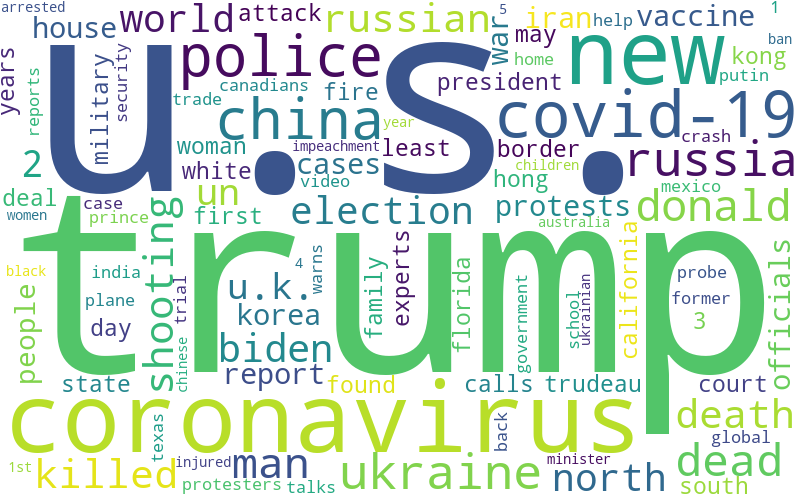

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))

draw_wordcloud(counter_all, f"{outcome_folder}/week6_wordcloud_all.png", 100)

### Popular Verbs Representing Behavioral Aspects

In [ ]:
counter_verbs = get_counter(df, global_stopwords+local_stopwords, "VB")
counter_verbs.most_common(50)

[('killed', 524),
 ('shooting', 371),
 ('found', 283),
 ('calls', 278),
 ('arrested', 205),
 ('charged', 178),
 ('know', 169),
 ('missing', 158),
 ('accused', 156),
 ('take', 155),
 ('warns', 151),
 ('help', 147),
 ('injured', 141),
 ('continue', 140),
 ('set', 137),
 ('hit', 134),
 ('killing', 133),
 ('get', 129),
 ('faces', 115),
 ('show', 114),
 ('following', 113),
 ('continues', 112),
 ('leaves', 107),
 ('end', 106),
 ('need', 106),
 ('dies', 103),
 ('wants', 103),
 ('stop', 102),
 ('face', 101),
 ('died', 99),
 ('released', 98),
 ('shows', 94),
 ('make', 93),
 ('leave', 91),
 ('expected', 91),
 ('left', 89),
 ('makes', 89),
 ('held', 88),
 ('including', 88),
 ('detained', 88),
 ('go', 87),
 ('gets', 84),
 ('call', 84),
 ('made', 81),
 ('takes', 80),
 ('hits', 80),
 ('fired', 80),
 ('wins', 79),
 ('used', 77),
 ('threatens', 77)]

동사로 한정지은 키워드 분석에서는 기사에서 많이 쓰이는 'found', 'know', 'show', 'released'와 같은 키워드와

'killed', 'shooting', 'arrested', 'charged', 'injured'와 같은 전쟁, 범죄, 질병과 관련된 키워드들을 볼 수 있음  

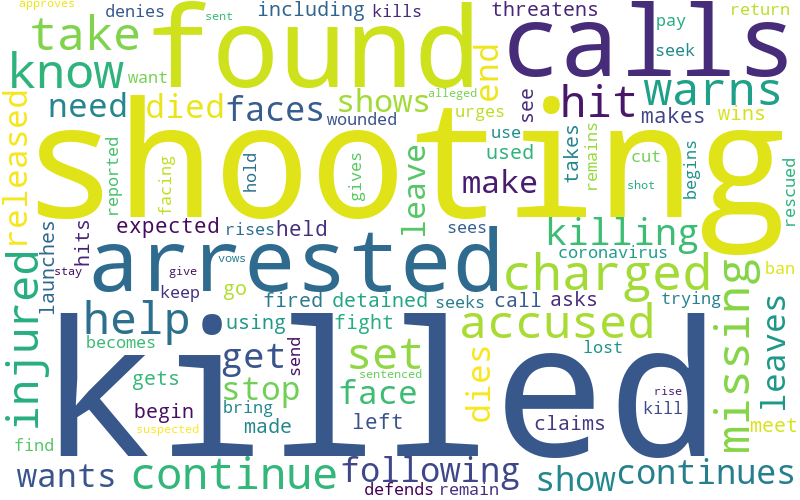

In [ ]:
draw_wordcloud(counter_verbs, f"{outcome_folder}/week6_wordcloud_verbs.png", 100)

## Time Series Analysis

In [ ]:
df.datetime.min(), df.datetime.max()

(Timestamp('2018-01-01 00:20:00'), Timestamp('2023-02-02 23:05:00'))

수집된 웹 페이지들이 게재된 기간은 2018년 1월 1일부터 2023년 2월 2일로서  약 5년의 time range를 가짐.

In [ ]:
import numpy as np

count = pd.Series(data=1, index=df.datetime).resample(rule="w").count()
count

datetime
2018-01-07    87
2018-01-14    98
2018-01-21    94
2018-01-28    80
2018-02-04    92
              ..
2023-01-08    62
2023-01-15    56
2023-01-22    52
2023-01-29    47
2023-02-05    26
Freq: W-SUN, Length: 266, dtype: int64

In [ ]:
count.mean(), count.std()

(85.33082706766918, 23.345064301430103)

주별 게재 건수의 평균은 약 85건, 표준편차는 약 23건으로서, 매주 평균 85건 정도의 기사가 게재되었음.

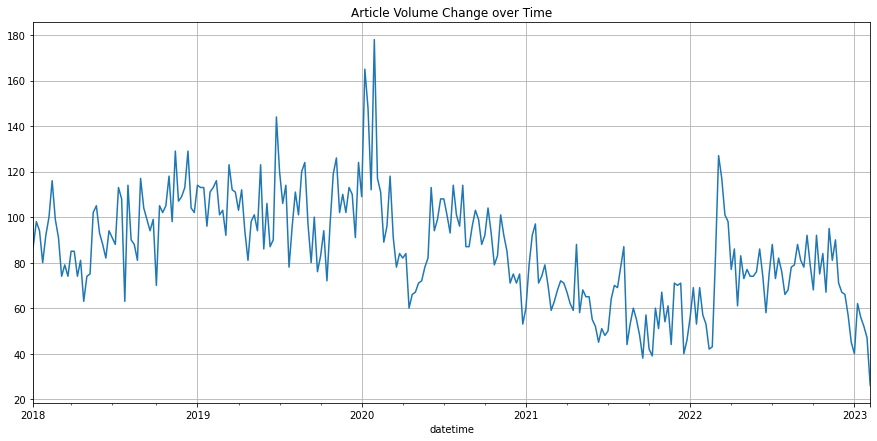

In [ ]:
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

### Yearly Analysis

In [ ]:
print(len(df[(df.datetime >= "2018-01-01") & (df.datetime < "2019-01-01")]))
print(len(df[(df.datetime >= "2019-01-01") & (df.datetime < "2020-01-01")]))
print(len(df[(df.datetime >= "2020-01-01") & (df.datetime < "2021-01-01")]))
print(len(df[(df.datetime >= "2021-01-01") & (df.datetime < "2022-01-01")]))
print(len(df[(df.datetime >= "2022-01-01")]))

4945
5416
4942
3232
4163


매년 3000 ~ 5000개 정도의 article이 게재되었음

2018년부터 1년 단위로 한해동안의 주요 키워드를 추출함으로써 그 해의 주요 이슈를 파악하고자 하였음

(이때, 매해 중복적으로 나타나는 공통된 키워드보단 그 해에 새롭게 나타난 키워드에 집중하여 분석함)

#### 2018년  

In [ ]:
counter_2018 = get_counter(df[(df.datetime >= "2018-01-01") & (df.datetime < "2019-01-01")], global_stopwords+local_stopwords, "NN")
counter_2018.most_common(30)

[('trump', 977),
 ('u.s.', 541),
 ('donald', 456),
 ('man', 180),
 ('north', 178),
 ('police', 177),
 ('korea', 170),
 ('russia', 143),
 ('california', 117),
 ('house', 116),
 ('un', 114),
 ('china', 110),
 ('world', 99),
 ('saudi', 99),
 ('new', 97),
 ('school', 97),
 ('deal', 96),
 ('florida', 96),
 ('white', 92),
 ('report', 91),
 ('people', 88),
 ('trade', 86),
 ('woman', 85),
 ('trudeau', 84),
 ('death', 82),
 ('border', 81),
 ('attack', 79),
 ('south', 78),
 ('tariffs', 77),
 ('kim', 76)]

북한, 캘리포니아, 사우디, 플로리다등의 키워드를 볼 수 있음

키워드만으로는 주요 사건을 파악할 수 없어서 하나하나 분석하기로 함

In [ ]:
mask = (df.title.str.contains("north korea", case=False)) & (df.datetime >= "2018-01-01") & (df.datetime < "2019-01-01")
counter_2018_northkorea = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2018_northkorea.most_common(30)

[('korea', 148),
 ('north', 147),
 ('trump', 45),
 ('u.s.', 44),
 ('donald', 27),
 ('un', 23),
 ('kim', 22),
 ('south', 20),
 ('summit', 20),
 ('jong', 20),
 ('talks', 18),
 ('olympics', 14),
 ('sanctions', 13),
 ('denuclearization', 12),
 ('weapons', 10),
 ('winter', 9),
 ('missile', 9),
 ('china', 7),
 ('test', 7),
 ('meeting', 7),
 ('site', 7),
 ('war', 6),
 ('threat', 6),
 ('mike', 6),
 ('pompeo', 6),
 ('report', 5),
 ('japan', 5),
 ('officials', 4),
 ('warns', 4),
 ('state', 4)]

- 북한과 미국이 한반도의 비핵화를 약속한 북미정상회담  

In [ ]:
mask = (df.title.str.contains("california", case=False)) & (df.datetime >= "2018-01-01") & (df.datetime < "2019-01-01")
counter_2018_california = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2018_california.most_common(30)

[('california', 117),
 ('wildfire', 23),
 ('wildfires', 16),
 ('man', 14),
 ('fire', 9),
 ('victims', 8),
 ('death', 8),
 ('police', 7),
 ('firefighters', 7),
 ('home', 7),
 ('trump', 7),
 ('mudslides', 6),
 ('crews', 6),
 ('family', 6),
 ('video', 6),
 ('toll', 6),
 ('search', 5),
 ('day', 4),
 ('children', 4),
 ('state', 4),
 ('thousands', 4),
 ('northern', 4),
 ('camp', 4),
 ('southern', 3),
 ('parents', 3),
 ('couple', 3),
 ('shows', 3),
 ('homes', 3),
 ('suspect', 3),
 ('officials', 3)]

- 캘리포니아 산불

In [ ]:
mask = (df.title.str.contains("saudi", case=False)) & (df.datetime >= "2018-01-01") & (df.datetime < "2019-01-01")
counter_2018_saudi = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2018_saudi.most_common(30)

[('saudi', 99),
 ('khashoggi', 47),
 ('arabia', 43),
 ('jamal', 25),
 ('journalist', 21),
 ('prince', 20),
 ('murder', 11),
 ('trump', 10),
 ('u.s.', 10),
 ('trudeau', 9),
 ('yemen', 8),
 ('turkey', 7),
 ('saudis', 6),
 ('case', 6),
 ('arms', 6),
 ('crown', 6),
 ('donald', 5),
 ('rights', 4),
 ('spat', 4),
 ('war', 4),
 ('consulate', 4),
 ('bin', 4),
 ('pompeo', 4),
 ('cia', 4),
 ('freeland', 3),
 ('evidence', 3),
 ('coalition', 3),
 ('un', 3),
 ('women', 3),
 ('oil', 3)]

- 사우디 왕세자의 카슈끄지 살해 승인사건

In [ ]:
mask = (df.title.str.contains("florida", case=False)) & (df.datetime >= "2018-01-01") & (df.datetime < "2019-01-01")
counter_2018_florida = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2018_florida.most_common(30)

[('florida', 96),
 ('school', 28),
 ('shooting', 13),
 ('man', 10),
 ('police', 9),
 ('trump', 9),
 ('students', 6),
 ('cruz', 6),
 ('nikolas', 6),
 ('race', 6),
 ('bridge', 5),
 ('survivor', 5),
 ('victims', 5),
 ('survivors', 5),
 ('guns', 4),
 ('gunman', 4),
 ('donald', 4),
 ('woman', 4),
 ('recount', 4),
 ('u.s.', 3),
 ('court', 3),
 ('suspect', 3),
 ('shooter', 3),
 ('gun', 3),
 ('video', 3),
 ('nra', 3),
 ('melania', 3),
 ('senate', 3),
 ('law', 3),
 ('hurricane', 3)]

- 플로리다 고등학교의 총기 난사 사건  

#### 2019년  

In [ ]:
counter_2019 = get_counter(df[(df.datetime >= "2019-01-01") & (df.datetime < "2020-01-01")], global_stopwords+local_stopwords, "NN")
counter_2019.most_common(30)

[('trump', 783),
 ('u.s.', 627),
 ('police', 215),
 ('man', 203),
 ('china', 179),
 ('kong', 179),
 ('hong', 179),
 ('new', 167),
 ('protests', 130),
 ('brexit', 128),
 ('report', 120),
 ('u.k.', 115),
 ('house', 115),
 ('protesters', 113),
 ('un', 109),
 ('border', 105),
 ('woman', 100),
 ('death', 100),
 ('donald', 97),
 ('election', 96),
 ('president', 95),
 ('deal', 94),
 ('iran', 91),
 ('north', 89),
 ('world', 88),
 ('mueller', 88),
 ('russia', 87),
 ('people', 84),
 ('attack', 83),
 ('california', 82)]

- 홍콩과 중국의 갈등으로 인한 많은 시위가 있었음  

#### 2020년  

In [ ]:
counter_2020 = get_counter(df[(df.datetime >= "2020-01-01") & (df.datetime < "2021-01-01")], global_stopwords+local_stopwords, "NN")
counter_2020.most_common(30)

[('coronavirus', 1206),
 ('u.s.', 835),
 ('trump', 687),
 ('china', 256),
 ('covid-19', 242),
 ('cases', 234),
 ('election', 220),
 ('police', 209),
 ('biden', 181),
 ('iran', 156),
 ('new', 153),
 ('death', 153),
 ('officials', 139),
 ('protests', 132),
 ('vaccine', 120),
 ('george', 104),
 ('man', 103),
 ('floyd', 102),
 ('experts', 101),
 ('world', 91),
 ('australia', 87),
 ('state', 84),
 ('plane', 83),
 ('house', 83),
 ('health', 83),
 ('protesters', 81),
 ('kong', 79),
 ('hong', 79),
 ('court', 77),
 ('day', 76)]

- 코로나 바이러스의 확산과 미국 대선

In [ ]:
mask = (df.title.str.contains("australia", case=False)) & (df.datetime >= "2020-01-01") & (df.datetime < "2021-01-01")
counter_2020_australia = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2020_australia.most_common(30)

[('australia', 87),
 ('wildfires', 23),
 ('coronavirus', 14),
 ('fires', 8),
 ('new', 6),
 ('wildfire', 6),
 ('state', 6),
 ('china', 6),
 ('bushfires', 5),
 ('fire', 5),
 ('death', 4),
 ('pm', 4),
 ('country', 4),
 ('dog', 4),
 ('man', 4),
 ('law', 4),
 ('officials', 4),
 ('protests', 4),
 ('zealand', 3),
 ('victims', 3),
 ('relief', 3),
 ('firefighter', 3),
 ('home', 3),
 ('south', 3),
 ('thousands', 3),
 ('homes', 3),
 ('animals', 3),
 ('u.s.', 3),
 ('emergency', 3),
 ('covid-19', 3)]

- 호주 산불  

#### 2021년  

In [ ]:
counter_2021 = get_counter(df[(df.datetime >= "2021-01-01") & (df.datetime < "2022-01-01")], global_stopwords+local_stopwords, "NN")
counter_2021.most_common(30)

[('u.s.', 503),
 ('covid-19', 466),
 ('vaccine', 221),
 ('biden', 158),
 ('trump', 152),
 ('china', 132),
 ('police', 105),
 ('u.k.', 98),
 ('capitol', 90),
 ('olympics', 88),
 ('variant', 87),
 ('tokyo', 82),
 ('cases', 76),
 ('myanmar', 73),
 ('coronavirus', 70),
 ('india', 70),
 ('death', 70),
 ('officials', 66),
 ('trial', 66),
 ('experts', 65),
 ('afghanistan', 63),
 ('vaccines', 61),
 ('taliban', 61),
 ('new', 59),
 ('world', 59),
 ('man', 55),
 ('protests', 55),
 ('day', 55),
 ('omicron', 52),
 ('astrazeneca', 50)]

- 코로나 확산이 이어졌고 도쿄 올림픽이 개최되었음

In [ ]:
mask = (df.title.str.contains("afghanistan", case=False)) & (df.datetime >= "2020-01-01") & (df.datetime < "2021-01-01")
counter_2021_afghanistan = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2021_afghanistan.most_common(30)

[('afghanistan', 13),
 ('u.s.', 7),
 ('taliban', 5),
 ('officials', 4),
 ('peace', 3),
 ('withdrawal', 3),
 ('attack', 2),
 ('official', 2),
 ('deal', 2),
 ('troops', 2),
 ('trump', 2),
 ('casualties', 1),
 ('mission', 1),
 ('soldiers', 1),
 ('truce', 1),
 ('signs', 1),
 ('effort', 1),
 ('war', 1),
 ('terms', 1),
 ('way', 1),
 ('american', 1),
 ('ceasefire', 1),
 ('commander', 1),
 ('conditions', 1),
 ('vice', 1),
 ('bomb', 1),
 ('president', 1),
 ('others', 1),
 ('negotiations', 1),
 ('pompeo', 1)]

- 탈레반과 아프가니스탄 중앙정부의 내전이 있었음

#### 2022년 ~

In [ ]:
counter_2022 = get_counter(df[(df.datetime >= "2022-01-01")], global_stopwords+local_stopwords, "NN")
counter_2022.most_common(30)

[('ukraine', 649),
 ('u.s.', 461),
 ('russia', 456),
 ('war', 229),
 ('china', 165),
 ('covid-19', 144),
 ('world', 115),
 ('biden', 107),
 ('police', 103),
 ('trump', 102),
 ('death', 101),
 ('un', 90),
 ('putin', 85),
 ('sanctions', 80),
 ('invasion', 79),
 ('trudeau', 75),
 ('u.k.', 74),
 ('elizabeth', 72),
 ('man', 68),
 ('people', 65),
 ('queen', 65),
 ('new', 64),
 ('twitter', 64),
 ('nato', 63),
 ('experts', 62),
 ('years', 62),
 ('officials', 61),
 ('musk', 60),
 ('korea', 58),
 ('report', 57)]

- 러시아의 우크라이나 침공으로 인해 전쟁이 시작되었음

In [ ]:
mask = (df.title.str.contains("elizabeth", case=False)) & (df.datetime >= "2022-01-01")
counter_2022_elizabeth = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2022_elizabeth.most_common(30)

[('elizabeth', 72),
 ('queen', 47),
 ('ii', 31),
 ('death', 19),
 ('jubilee', 7),
 ('charles', 6),
 ('u.k.', 5),
 ('monarch', 5),
 ('state', 5),
 ('platinum', 4),
 ('mobility', 4),
 ('world', 4),
 ('coffin', 4),
 ('covid-19', 3),
 ('trudeau', 3),
 ('prince', 3),
 ('issues', 3),
 ('holmes', 3),
 ('theranos', 3),
 ('life', 3),
 ('iii', 3),
 ('william', 3),
 ('harry', 3),
 ('legacy', 2),
 ('look', 2),
 ('symptoms', 2),
 ('meeting', 2),
 ('day', 2),
 ('ex-partner', 2),
 ('sunny', 2)]

- 영국의 엘리자베스 2세 여왕의 서거

In [ ]:
mask = (df.title.str.contains("twitter", case=False)) & (df.datetime >= "2022-01-01")
counter_2022_twitter = get_counter(df[mask], global_stopwords+local_stopwords, "NN")
counter_2022_twitter.most_common(30)

[('twitter', 64),
 ('musk', 48),
 ('elon', 43),
 ('trump', 8),
 ('us', 8),
 ('deal', 8),
 ('takeover', 7),
 ('russia', 4),
 ('bid', 4),
 ('account', 4),
 ('donald', 4),
 ('company', 4),
 ('poll', 4),
 ('facebook', 3),
 ('ukraine', 3),
 ('board', 3),
 ('sources', 3),
 ('tesla', 3),
 ('users', 3),
 ('lawsuit', 3),
 ('report', 3),
 ('sparks', 2),
 ('un', 2),
 ('workers', 2),
 ('investor', 2),
 ('misinformation', 2),
 ('offer', 2),
 ('experts', 2),
 ('shares', 2),
 ('banks', 2)]

- 일론 머스크의 트위터 인수  

### Peak Week Analysis

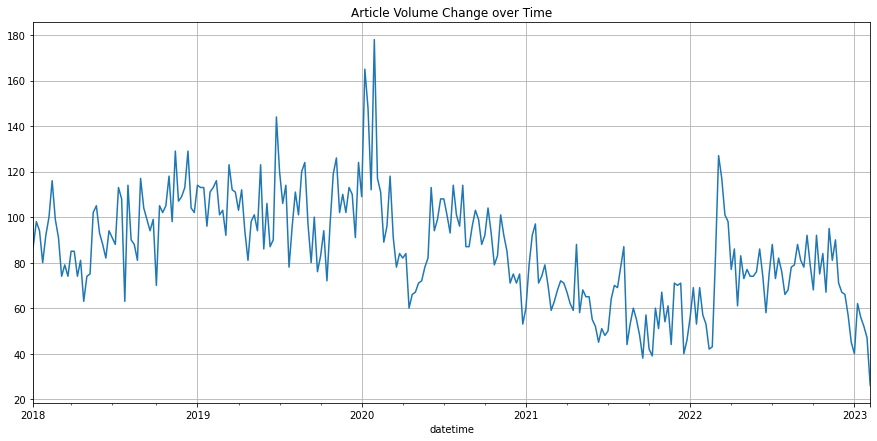

In [ ]:
count = pd.Series(data=1, index=df.datetime).resample(rule="w").count()
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

In [ ]:
count.max(), count.idxmax()

(178, Timestamp('2020-02-02 00:00:00', freq='W-SUN'))

가장 많이 게재된 peak week는 2020년 1월 27일 주간으로서, 코로나의 세계적인 확산이 진행되면서 평균 85건을 크게 웃도는 총 178건의 글이 게재되었음.   

In [ ]:
df[(df.datetime >= "2020-01-27") & (df.datetime < "2020-02-03")][["datetime", "title", "body"]]

,datetime,title,body
11493,2020-01-27 06:50:00,"2 injured after Iran passenger plane crash-lands on runway, skids onto highway","An aging Iranian passenger airliner carrying 144 people crash-landed on a runway and skidded onto a major highway next to an airport Monday, the l..."
11491,2020-01-27 07:36:00,‘We’re trying to have hope’: Pregnant B.C. woman stuck in coronavirus epicentre,A teacher who is living with his pregnant wife and child in a city that is at the epicentre of China’s coronavirus outbreak is hoping to get his f...
11488,2020-01-27 08:19:00,Iran should not let Trump’s ‘maximum pressure’ harm national unity: president,"Iranians should not allow U.S. President Donald Trump‘s “maximum pressure” approach to harm national unity ahead of parliamentary elections, Presi..."
11504,2020-01-27 08:59:00,Coronavirus risk remains low in Canada despite first presumptive case: health officials,"EDITOR’S NOTE: A previous version of this story erroneously identified the airline as Southern China Airline. The airline is, in fact, called Chin..."
11517,2020-01-27 09:00:00,Canada preparing after health officials say coronavirus will ‘likely’ hit country,"As the new coronavirus claims more lives in China, health authorities in this country are trying to reassure Canadians that plans and procedures a..."
...,...,...,...
11429,2020-02-02 18:02:00,American evacuated from China coronavirus zone quarantined in California: official,One of the 195 Americans evacuated from the virus outbreak zone in China and temporarily housed at a Southern California military base for monitor...
11336,2020-02-02 18:22:00,WHO warns countries to prepare as coronavirus death toll rises to 304,China’s death toll from a new virus rose to 304 and a World Health Organization official said other governments need to prepare for “domestic outb...
11313,2020-02-02 18:56:00,02/02/2020: Rare ‘universal palindrome’ day celebrated around the world,"Mathematicians and geeks everywhere celebrated a rare occurrence Sunday, 02/02/2020, a kind of 8-digit palindrome that hasn’t happened for more th..."
11309,2020-02-02 21:38:00,Some Canadians living in China say they don’t fear contracting coronavirus,The Canadian government is warning those on the ground in China there could be more passengers than seats on the evacuation plane.With hundreds wa...


In [ ]:
counter_peak = get_counter(df[(df.datetime >= "2020-01-27") & (df.datetime < "2020-02-03")], global_stopwords+local_stopwords, "NN")
counter_peak.most_common(30)

[('coronavirus', 46),
 ('china', 25),
 ('trump', 21),
 ('u.s.', 15),
 ('death', 12),
 ('bryant', 11),
 ('kobe', 11),
 ('outbreak', 9),
 ('health', 7),
 ('trial', 7),
 ('wuhan', 6),
 ('experts', 6),
 ('prince', 6),
 ('toll', 6),
 ('spread', 6),
 ('brexit', 6),
 ('days', 5),
 ('day', 5),
 ('bolton', 5),
 ('witnesses', 5),
 ('system', 5),
 ('officials', 4),
 ('cases', 4),
 ('state', 4),
 ('countries', 4),
 ('mexico', 4),
 ('helicopter', 4),
 ('europe', 4),
 ('wall', 4),
 ('canadians', 4)]

실제로 이 기간 동안 게재된 글들의 샘플과 키워드 랭킹을 살펴보면 상당 부분 코로나 바이러스와 관련된 내용임을 확인할 수 있음.  

In [ ]:
mask = df.body.str.contains("coronavirus", case=False) | df.body.str.contains("covid-19", case=False)
df[mask][["datetime", "title", "body"]]

,datetime,title,body
1639,2018-02-27 11:45:00,"Measles outbreak: How a decades old, fraudulent anti-vaccine study still affects public health",A measles outbreak is spreading across Europe and health experts say it’s because of a steadily growing anti-vaccination movement.READ MORE: Deadl...
4554,2018-10-23 15:30:00,"With winter on the way, here are 7 home remedies to help tackle your cough","Do you have a lingering cough you can’t wait to get rid of? You’re not alone.The winter season can see an increase in coughs and colds, with some ..."
4818,2019-02-08 14:55:00,Measles cases tripled in Europe last year — the highest it’s been in a decade,"The number of recorded measles cases in Europe more than tripled between 2017 and 2018, marking the highest it’s been in a decade, the World Healt..."
4778,2019-02-12 12:49:00,Measles vaccinations spike 500% after outbreak hits anti-vaxxer ‘hotspot’,"It hasn’t even been a month since the state of Washington declared a public-health emergency over a measles outbreak, and health officials are rep..."
6400,2019-03-10 06:00:00,8 countries facing measles outbreaks more serious than Canada’s,Vancouver’s measles outbreak — like most Canadian measles outbreaks — was started by a traveller bringing the virus from overseas.With just 17 con...
...,...,...,...
21728,2023-01-28 12:11:00,Holiday travel within China surges 74% after COVID curbs scrapped,"Lunar New Year holiday trips inside China surged 74% from last year after authorities scrapped COVID-19 travel curbs, state media reported on Satu..."
22749,2023-01-30 15:17:00,"COVID-19 pandemic in ‘transition point,’ but remains global health emergency: WHO","The World Health Organization (WHO) said on Monday that COVID-19 continues to constitute a public health emergency of international concern, its h..."
22733,2023-02-02 13:13:00,Looking for love? 44% U.S. adults use dating apps to find long-term partners: study,"Whether looking for love or a casual encounter, 3 in 10 U.S. adults say they have used a dating site or app _ with mixed experiences, according to..."
22729,2023-02-02 13:55:00,No more rate hikes? Central banks see calm in sight amid inflation battle,"Global central banks that raced to raise interest rates last year amid soaring inflation are now laying the groundwork in unison for a pause that,..."


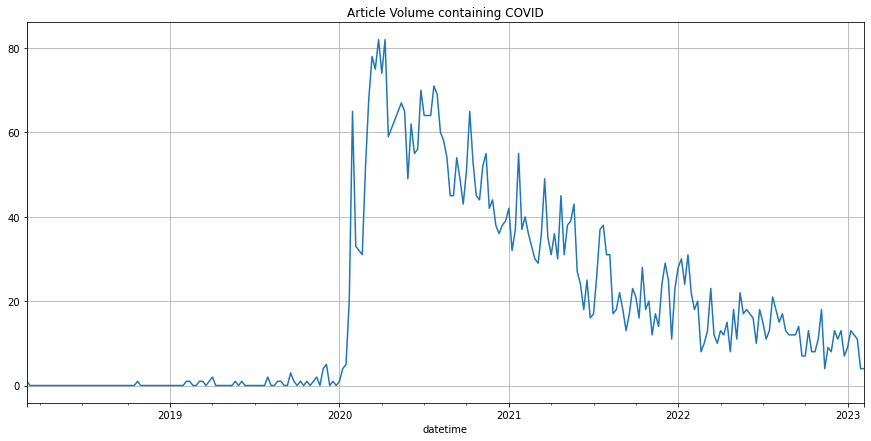

In [ ]:
count = pd.Series(data=1, index=df[mask].datetime).resample(rule="w").count()
count.plot(kind="line", title="Article Volume containing COVID", figsize=(15,7), grid=True)

2020년 코로나 확산이 시작되면서 많은 기사가 게재되었고 점차 줄어드는 것을 볼 수 있음

## Document Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.body)

In [ ]:
X.shape

(22698, 144573)

There are 22,698 documents and 144,573 words, or features.

### K-Means Clustering

### Step 1. Choose the number of clusters

In [ ]:
k = 8

### Step 2. Initialize a model object for k-means clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(random_state=0)

### Step 3. Fit the model using the input data

In [ ]:
%time kmeans.fit(X)

CPU times: user 1min 17s, sys: 1.2 s, total: 1min 18s
Wall time: 53.2 s


KMeans(random_state=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster.

In [ ]:
kmeans.labels_

array([0, 6, 7, ..., 0, 0, 0], dtype=int32)

In [ ]:
df["cluster"] = kmeans.labels_

In [ ]:
df[["title", "body", "cluster"]]

,title,body,cluster
723,2018 New Year’s celebrations around the world,"Spectacular fireworks have lit up the skies in Hong Kong, Australia and elsewhere in Asia as revelers ring in 2018. A look at how people around th...",0
722,Iran protests fueled by young people more interested in jobs than Islamist idealism,"LONDON, Dec 31 (Reuters) – Iran warned of a tough crackdown on Sunday against demonstrators posing one of the boldest challenges to its clerical l...",6
721,‘Nuclear button is always on my desk’: Kim Jong-Un warns U.S. in New Year’s address,"SEOUL, Jan 1 (Reuters) – North Korean leader Kim Jong Un said on Monday that the United States will never be able to start a war against North Kor...",7
719,Polar bear dips: Canada’s bravest ring in the new year with an icy swim,"While two annual New Year’s Day polar bear swims were cancelled due to extreme cold, nothing could keep swimmers in Halifax out of the frigid Atla...",0
718,Here’s what the world’s largest firework looks like,"It should come as no surprise that the United Arab Emirates takes its New Year’s Eve celebrations seriously.Every year, the country welcomes milli...",0
...,...,...,...
22728,Young couple who danced in viral video handed lengthy jail sentence in Iran,A young couple in Iran have been arrested and imprisoned after posting a video of themselves dancing together in front of Tehran’s Azadi (Freedom)...,6
22726,Canada extends COVID-19 measures for travellers from China to early April,"Canada is extending its COVID-19 testing requirements for travellers from China, Hong Kong and Macau for another two months, the federal governmen...",3
22727,Is TikTok a risk to Canadian privacy? A federal committee wants to find out,"A House of Commons committee voted on Wednesday to launch a study into TikTok, a popular social media app that’s come under scrutiny over its ties...",0
22724,"At least 17 dead after bus-truck collision in Pakistan, official says",A head-on collision between a passenger bus and a speeding truck trailer near a tunnel in northwest Pakistan overnight killed at least 17 passenge...,0


In [ ]:
count2 = df.cluster.value_counts()
count2

0    13716
5     2622
3     2387
6     1379
1     1183
2      631
7      462
4      318
Name: cluster, dtype: int64

전체 문서들에 대해 다양한 개수의 클러스터를 찾아본 결과 8개의 클러스터를 찾았을 때 비교적 균형 있는 클러스터들을 구할 수 있었음.  

In [ ]:
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th, cluster_6th, cluster_7th, cluster_8th = df.cluster.value_counts().index

In [ ]:
df[df.cluster == cluster_2nd].sample(10, random_state=0)[["title", "body", "cluster"]]

,title,body,cluster
20054,"Jan. 6 hearing: Trump ‘detached from reality’ after election loss, witnesses say","Donald Trump’s closest campaign advisers, top government officials and even his family were dismantling his false claims of 2020 election fraud ah...",5
17511,"Trump’s personal priorities leaving Republican agenda in limbo, party members say",Republicans are fighting to seize control of Congress. Just don’t ask what they’d do if they win.Look no further for evidence of the GOP’s muddled...,5
11434,"Part of Donald Trump’s ‘virtually impenetrable’ border wall blows over, lands in Mexico","Part of Donald Trump‘s border wall had a great fall, and construction workers are trying to put it back together again.Concrete used to anchor the...",5
14788,‘It’s over’: QAnon believers left reeling after Biden replaces Trump,"Joe Biden is President of the United States, Donald Trump has retreated to his golf resort in Florida, John F. Kennedy Jr. is still dead and the Q...",5
6688,"Republican Bill Weld says U.S. can’t afford another Trump term, will challenge in 2020","Former Massachusetts Governor Bill Weld, the first Republican to challenge President Donald Trump for their party’s presidential nomination in 202...",5
15306,FACT CHECK: Trump’s election claims in 46-minute video are all wrong,"Clinging to notions of widespread vote rigging that his own attorney general has disputed, U.S. President Donald Trump repeated a litany of basele...",5
15476,Trump shares Elections Canada tweet after falsely claiming machines led to voter fraud,U.S. President Donald Trump retweeted a post from Elections Canada outlining the country’s voting system after perpetuating unsubstantiated claims...,5
4621,3 in 4 Americans don’t believe Brett Kavanaugh told the complete truth: poll,WASHINGTON — Just 1 in 4 people thinks Brett Kavanaugh was completely honest when he heatedly rebuffed charges of sexual assault and heavy drinkin...,5
5323,Can Trump declare a national emergency to build his wall? Legal experts are torn,The Trump administration is weighing using a national emergency declaration to circumvent Congress and the budget stalemate and force construction...,5
6183,"Beyond Mueller, Trump still faces investigations in New York","President Donald Trump portrayed Robert Mueller as the bane of his existence, but even with the special counsel’s Russia investigation wrapped up,...",5


In [ ]:
counter_2 = get_counter(df[df.cluster == cluster_2nd], global_stopwords+local_stopwords)
counter_2.most_common(30)

[('trump', 1808),
 ('u.s.', 608),
 ('donald', 409),
 ('biden', 249),
 ('election', 239),
 ('house', 235),
 ('impeachment', 208),
 ('white', 152),
 ('democrats', 139),
 ('mueller', 137),
 ('coronavirus', 123),
 ('russia', 116),
 ('probe', 103),
 ('report', 102),
 ('campaign', 100),
 ('new', 96),
 ('senate', 88),
 ('presidential', 83),
 ('trial', 77),
 ('2020', 74),
 ('former', 71),
 ('border', 69),
 ('court', 68),
 ('president', 67),
 ('republicans', 65),
 ('calls', 64),
 ('state', 64),
 ('capitol', 63),
 ('fbi', 62),
 ('democratic', 62)]

미국 대선과 관련된 클러스터를 볼 수 있음  

In [ ]:
df[df.cluster == cluster_3rd].sample(10, random_state=0)[["title", "body", "cluster"]]

,title,body,cluster
16842,Hawaii governor says non-essential travel to state ‘risky’ as COVID-19 surges,Hawaii’s governor asked Monday that visitors and residents reduce travel to the islands to essential business only while the state struggles to co...,3
14726,Will Canadians get to choose which COVID-19 vaccine they get?,"Two vaccines are already approved, two are under review, and two more are in the pipeline, making it possible that Canadians could eventually have...",3
20589,White House presses Congress to approve ‘urgent’ COVID-19 funding,"For much of the past two years, America has been first in line for COVID-19 vaccines and treatments. Now, as drugmakers develop the next generatio...",3
21536,Joe Biden tests positive for COVID-19 again on Monday,"U.S. President Joe Biden tested positive for COVID-19 on Monday “as could be anticipated,” his physician said in a memo released by the White Hous...",3
13953,Coronavirus can survive up to 28 days on some surfaces — but heat makes a difference: study,"The novel coronavirus can survive for up to 28 days on common surfaces such as glass, stainless steel and banknotes, an Australian government rese...",3
20149,U.S. FDA warns against heart inflammation risk from Novavax COVID-19 vaccine,"The U.S. Food and Drug Administration has raised concerns about a possible risk of heart inflammation from Novavax Inc’s NVAX.OCOVID-19 vaccine, e...",3
11508,Officials interviewing all those in contact with Canada’s 1st coronavirus patient,Officials in Toronto are interviewing all those who had contact with the man diagnosed with Canada’s first case of the new coronavirus to ensure n...,3
13116,"Trump changes tone on coronavirus, says things will get worse before it gets better","U.S. President Donald Trump warned on Tuesday that the “nasty horrible’” coronavirus will get worse in the U.S. before it gets better, but he also...",3
12269,"2 New York cats test positive for coronavirus, first pets in U.S.","Two pet cats in New York state have tested positive for the coronavirus, marking the first confirmed cases in companion animals in the United Stat...",3
21922,"China slams ‘excessive’ COVID-19 curbs on travellers, threatens to respond",The Chinese government blasted COVID-19 testing requirements imposed on passengers from China and threatened countermeasures against countries inv...,3


In [ ]:
counter_3 = get_counter(df[df.cluster == cluster_3rd], global_stopwords+local_stopwords)
counter_3.most_common(30)

[('coronavirus', 1074),
 ('covid-19', 899),
 ('vaccine', 392),
 ('u.s.', 390),
 ('cases', 336),
 ('new', 295),
 ('china', 226),
 ('variant', 114),
 ('u.k.', 112),
 ('outbreak', 104),
 ('experts', 101),
 ('deaths', 100),
 ('health', 93),
 ('pandemic', 84),
 ('omicron', 83),
 ('travel', 82),
 ('lockdown', 82),
 ('pfizer', 82),
 ('vaccines', 81),
 ('world', 80),
 ('death', 76),
 ('officials', 76),
 ('trump', 75),
 ('reports', 71),
 ('countries', 66),
 ('restrictions', 66),
 ('surge', 64),
 ('india', 63),
 ('astrazeneca', 62),
 ('million', 61)]

코로나 바이러스와 관련된 클러스터를 볼 수 있음  

In [ ]:
df[df.cluster == cluster_5th].sample(10, random_state=0)[["title", "body", "cluster"]]

,title,body,cluster
19940,"Canada in ‘listening mode’, will take small Commonwealth nations’ concerns to G7: Joly",Foreign Affairs Minister Melanie Joly says Canada will be bringing the concerns of smaller Commonwealth nations to the G7 leaders in Germany Sunda...,1
19254,"War in Ukraine: American Express halts all operations in Russia, Belarus","American Express Co AXP.N said on Sunday it was suspending all operations in Russia and Belarus, joining a growing number of Western corporations ...",1
20555,Ukrainian refugees face employment challenges in starting new lives in Saskatchewan,"As Russia continues to wage its war on Ukraine, more and more people escaping the violence are calling for help as they try to start a new life.On...",1
19104,Russia strikes Kyiv apartments as Zelenskyy hints at NATO compromise,The latest as of 2:49 p.m. ET on Tuesday:Russian air strikes and shelling smashed into buildings in the Ukrainian capital Kyiv on Tuesday as invad...,1
18939,"War in Ukraine is reaching a stalemate, experts say. Here’s what that could mean","Signs are emerging that the war in Ukraine is developing into a prolonged stalemate, which experts predict will be devastating to the forces on bo...",1
20521,"EU readies Russian oil ban with possible exemptions for wary nations, officials say","The European Union was preparing a ban on Russian oil, with possible exemptions for wary countries, as EU energy ministers on Monday held crisis t...",1
22048,Canada revokes Russian sanctions exemption that allowed return of Nord Stream turbine,Canada is revoking the exemptions to sanctions that allowed a Montreal company to repair turbines for a natural gas pipeline operated by Russian s...,1
19961,"Russia to blame for sky-high prices, Trudeau says amid $250M pledge in food aid",Prime Minister Justin Trudeau is blaming Russia for the skyrocketing energy and food prices that have left millions of people in Africa and other ...,1
19229,"World Bank approves $723M in loans, grants for Ukraine amid Russian invasion","The World Bank said its executive board on Monday approved a $723 million package of loans and grants for Ukraine, providing desperately needed go...",1
20664,U.K. revokes Moscow Stock Exchange’s recognized status over Ukraine war,Britain said on Tuesday it planned to revoke the Moscow Stock Exchange’s (MOEX) status as a recognized stock exchange in response to Russia‘s inva...,1


In [ ]:
counter_5 = get_counter(df[df.cluster == cluster_5th], global_stopwords+local_stopwords)
counter_5.most_common(30)

[('ukraine', 663),
 ('russia', 472),
 ('russian', 305),
 ('war', 192),
 ('ukrainian', 131),
 ('u.s.', 129),
 ('putin', 124),
 ('sanctions', 69),
 ('invasion', 69),
 ('zelenskyy', 57),
 ('nato', 55),
 ('nuclear', 50),
 ('new', 49),
 ('mariupol', 48),
 ('kyiv', 47),
 ('military', 46),
 ('biden', 43),
 ('un', 43),
 ('warns', 42),
 ('trudeau', 35),
 ('troops', 33),
 ('weapons', 31),
 ('moscow', 31),
 ('calls', 31),
 ('forces', 31),
 ('aid', 31),
 ('attack', 30),
 ('plant', 30),
 ('europe', 29),
 ('vladimir', 27)]

러시아와 우크라이나 전쟁과 관련된 클러스터를 볼 수 있음  

In [ ]:
df[df.cluster == cluster_8th].sample(10, random_state=0)[["title", "body", "cluster"]]

,title,body,cluster
12774,Jimmy Lai relieved he wasn’t sent to China after arrest in Hong Kong,"Jimmy Lai had just finished his morning exercise and was catching up on the news when the police arrived.“There were 15, 20 policemen there, and t...",4
13879,Chinese lawmakers pass amendments to criminalize insulting national flag,The Standing Committee of China’s congress on Saturday passed amendments to a law that will criminalize the intentional insulting of the national ...,4
6907,Hong Kong protests reignite after deadline passes to scrap extradition bill,Several hundred people rallied in Hong Kong on Friday after the expiry of a deadline protesters set for the government to completely scrap a contr...,4
7952,‘I really can’t bear it anymore’: Hong Kong residents considering exodus abroad,A growing number of Hong Kong residents are considering moving abroad to countries such as Canada following over two months of mass pro-democracy ...,4
11837,"Canada concerned some of Israel and China’s policies undermine freedom, Trudeau says","Prime Minister Justin Trudeau waded into the foreign policies of Israel and China on Tuesday, expressing concerns over separate but controversial ...",4
7970,Hong Kong leader Carrie Lam wants ‘communication.’ Protesters want her resignation,Hong Kong‘s leader says she’s setting up a “communication platform” to resolve differences in the city after months of anti-government protests.Ch...,4
13094,U.K. citizenship pathway for Hong Kong residents violates international law: China,A new British policy allowing Hong Kong residents to claim British citizenship is a violation of international law and interferes with China’s int...,4
10558,Hong Kong Cross-Harbour Tunnel reopens as nearby university siege winds down,"A major tunnel in Hong Kong reopened on Wednesday as a weeklong police siege of a nearby university appeared to be winding down, closing one of th...",4
10495,China accuses UN human rights commissioner of stoking unrest in Hong Kong,China accused the UN high commissioner for human rights of emboldening “radical violence” in Hong Kong by suggesting the city’s leader conduct an ...,4
11961,"Hong Kong security bill ‘good for local investment,’ pro-China politicians argue",Hong Kong’s pro-Beijing politicians sought to allay worries about the impact of China’s proposed national security legislation on the Asian financ...,4


In [ ]:
counter_8 = get_counter(df[df.cluster == cluster_8th], global_stopwords+local_stopwords)
counter_8.most_common(30)

[('hong', 287),
 ('kong', 286),
 ('china', 75),
 ('protests', 65),
 ('protesters', 58),
 ('police', 53),
 ('law', 32),
 ('security', 31),
 ('chinese', 29),
 ('extradition', 24),
 ('bill', 21),
 ('pro-democracy', 18),
 ('leader', 17),
 ('u.s.', 17),
 ('activists', 15),
 ('new', 15),
 ('national', 13),
 ('protest', 12),
 ('u.k.', 12),
 ('lam', 12),
 ('arrest', 11),
 ('violence', 11),
 ('activist', 10),
 ('clash', 10),
 ('media', 10),
 ('carrie', 10),
 ('arrested', 10),
 ('violent', 9),
 ('city', 9),
 ('students', 9)]

횽콩과 중국의 갈등에 관련된 클러스터를 볼 수 있음  

## Topic Modeling

### Step 1. Choose the number of topics

In [ ]:
num_topics = 10

### Step 2. Initialize a model object for LDA topic modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(random_state=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [ ]:
%time lda.fit(X)

CPU times: user 1min 48s, sys: 16.8 s, total: 2min 5s
Wall time: 1min 51s


LatentDirichletAllocation(random_state=0)

### Step 4. Examine the output of topic modeling

In [ ]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [ ]:
show_topics(lda, vectorizer.get_feature_names_out(), 15)

*** Topic 0:
9.81 * griner + 3.51 * rolfe + 3.27 * brittney + 2.17 * zobayan + 2.08 * whelan + 1.83 * trevali + 1.74 * leilani + 1.73 * blais + 1.65 * akram + 1.55 * stromboli + 1.45 * cfc + 1.37 * reinoehl + 1.36 * holodomor + 1.31 * layaway + 1.20 * tacchetto

*** Topic 1:
19.19 * myanmar + 14.37 * kyi + 13.86 * suu + 11.08 * petito + 8.92 * nassar + 8.90 * junta + 7.78 * laundrie + 7.73 * aung + 6.66 * yangon + 4.04 * gendron + 3.74 * jayme + 3.17 * spears + 2.78 * ronaldo + 2.75 * gabby + 2.56 * cosby

*** Topic 2:
1.50 * mondale + 1.21 * dubois + 1.18 * goodson + 1.10 * tokushoryu + 1.04 * dyson + 1.00 * woodman + 0.95 * flynt + 0.95 * sandusky + 0.94 * nassib + 0.91 * brimley + 0.88 * nield + 0.87 * wegg + 0.86 * sorokin + 0.86 * lamilla + 0.85 * puebla

*** Topic 3:
138.51 * vaccine + 64.24 * vaccines + 52.04 * doses + 50.53 * pfizer + 42.96 * covid + 38.71 * astrazeneca + 35.21 * 19 + 33.09 * variant + 32.58 * dose + 25.95 * shots + 25.65 * moderna + 24.23 * vaccination + 24.16

### Topic Model Visualization

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

pyLDAvis: https://github.com/bmabey/pyLDAvis

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.300512 -0.061690       1        1  65.985323
4     -0.214036  0.083599       2        1  21.920295
9      0.050869 -0.063426       3        1   3.307392
3      0.062254  0.042842       4        1   1.990085
1      0.068948  0.000042       5        1   1.236941
6      0.067908  0.000187       6        1   1.180401
0      0.067034 -0.000176       7        1   1.136432
8      0.066934 -0.000040       8        1   1.131547
7      0.066093 -0.000566       9        1   1.089609
2      0.064508 -0.000771      10        1   1.021976, topic_info=             Term        Freq       Total Category  logprob  loglift
111877     russia  200.000000  200.000000  Default  30.0000  30.0000
133113    ukraine  176.000000  176.000000  Default  29.0000  29.0000
111897    russian  162.000000  162.000000  Default  28.0000  28.0000
32511       covid  204.000000  204.000000  Default  27.0000  27.0000
65598        iran  127.000000  127.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
20968   breedlove    0.133924    0.572438  Topic10  -9.8480   3.1308
9129       albury    0.132072    0.573839  Topic10  -9.8619   3.1144
16150      baxter    0.138552    0.781416  Topic10  -9.8140   2.8536
78559     mahomes    0.131201    0.596111  Topic10  -9.8685   3.0697
121548    spector    0.132316    0.845083  Topic10  -9.8600   2.7292

[558 rows x 6 columns], token_table=        Topic      Freq          Term
term                                 
1           1  0.556166           000
1           2  0.440298           000
946         1  0.269922            19
946         2  0.677352            19
946         4  0.050929            19
...       ...       ...           ...
142867      3  1.009453         yulia
143208      3  0.876232  zaporizhzhia
143390      1  0.364866     zelenskyy
143390      3  0.638515     zelenskyy
143851      6  1.014652           zte

[584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 10, 4, 2, 7, 1, 9, 8, 3])

<!-- 다양한 개수의 토픽들을 시도해보아도 주로 2개의 큰 토픽과 서로 대부분 겹치는 작은 토픽들로 나누어지는 것을 확인할 수 있었음. 다양한 주제들이 다루어지는 사이트임을 감안했을 때 3개의 토픽 수는 적은 감이 있음. 이중 하나의 토픽은 스포츠, 또 다른 토픽은 정치(특히 대선)에 관한 내용임.  -->
다양한 개수의 토픽들을 시도해본 결과 주요 4개의 토픽을 확인할 수 있음.

미국 대선, 코로나, 우크라이나-러시아 전쟁, 코로나 백신에 관한 토픽을 확인할 수 있었음.